## Portfolio Part 3

In this Portfolio task you will continue working with the movielens data collected by the GroupLens Research Project at the University of Minnesota. The columns in the dataset are a little bit different from the ones provided in the previous Portfolio tasks, where the 'rating' column is replaced by the 'feedback' column. There are two values regarding the 'feedback' with 1 indicating the user likes the corresponding movie; otherwise 0. 

The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | feedback | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __feedback__ - the user's feedback towards the movie (1 means 'like'; 0 means 'dislike')
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may like multiple movies and a same movie (i.e., a same movieId) may be preferred by multiple users.


Your high level goal in this notebook is to try to build and evaluate predictive models for feedback from available features - predict the value of the __feedback__ field in the data from some of the other fields. Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.

Note: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use a ___simple Logistic Regression model___ and ___one of the more advanced methods___ covered in recent weeks. Accordingly, discuss the performance of the simple and advanced methods.

In [13]:
#Importing all libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Exploring the Data

In [14]:
#Reading the csv file
df = pd.read_csv('files/movielens_data_feedback.csv')
df.head(10)

,userId,age,gender,occupation,movieId,feedback,genre,timestamp
0,196,49,M,writer,242,0,Comedy,881250949
1,186,39,F,executive,302,0,Crime,891717742
2,22,25,M,writer,377,0,Children,878887116
3,244,28,M,technician,51,0,Romance,880606923
4,166,47,M,educator,346,0,Drama,886397596
5,298,44,M,executive,474,1,War,884182806
6,115,31,M,engineer,265,0,Action,881171488
7,253,26,F,librarian,465,1,Adventure,891628467
8,305,23,M,programmer,451,0,Romance,886324817
9,6,42,M,executive,86,0,Drama,883603013


In [15]:
# Examine the data: check number of rows and number of columns
df.shape

(100000, 8)

In [16]:
# Look at the statistical summary of the dataframe
df.describe()

,userId,age,movieId,feedback,timestamp
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,32.969850,425.530130,0.553750,8.835289e+08
std,266.61442,11.562623,330.798356,0.497105,5.343856e+06
min,1.00000,7.000000,1.000000,0.000000,8.747247e+08
25%,254.00000,24.000000,175.000000,0.000000,8.794487e+08
50%,447.00000,30.000000,322.000000,1.000000,8.828269e+08
75%,682.00000,40.000000,631.000000,1.000000,8.882600e+08
max,943.00000,73.000000,1682.000000,1.000000,8.932866e+08


In [17]:
# Checking the types of category in the 'feedback' column
set(df['feedback'])

{0, 1}

In [18]:
# Check number of samples for each feedback
print("No. of negative feedbacks on movies: ", df[df['feedback'] == 0].shape[0])
print("No. of positive feedbacks on movies", df[df['feedback'] == 1].shape[0])
print("Percentage of negative feedbacks", (df[df['feedback'] == 0].shape[0]/df.shape[0])*100,"%")
print("Percentage of negative feedbacks", (df[df['feedback'] == 1].shape[0]/df.shape[0])*100,"%")

No. of negative feedbacks on movies:  44625
No. of positive feedbacks on movies 55375
Percentage of negative feedbacks 44.625 %
Percentage of negative feedbacks 55.375 %


NameError: name 'ax' is not defined

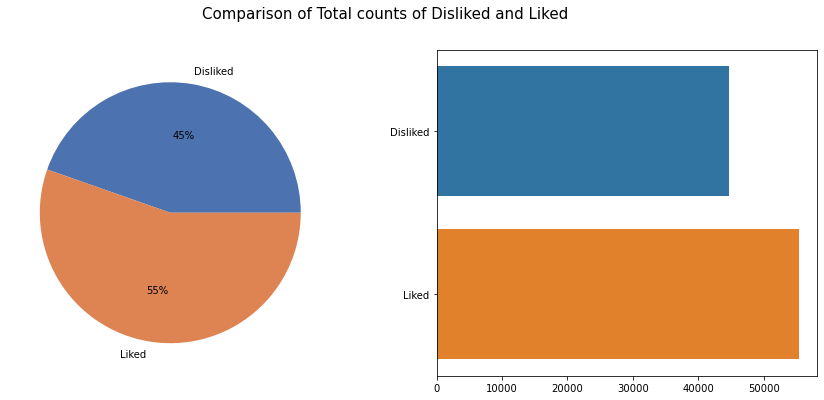

In [19]:

#Visualisation of target variable 'feedbkack'
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
fig.suptitle("Comparison of Total counts of Disliked and Liked",size=15)

data = [df[df['feedback'] == 0].shape[0], df[df['feedback'] == 1].shape[0]]
labels = ['Disliked', 'Liked']

colors = sns.color_palette('deep')[0:5]

#creating pie-chart and bar-chart
ax1.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
sns.barplot(data,labels,ax=ax2)
ax2.bar_label(ax.containers[0])
plt.show()


As we can see that number of positive feedbacks is around 55%, slightly greater than the negative ones. So, dataset is not equally balanced. This might cause some bias as the model will be much more likely to predict 1 instead of 0.

In [ ]:
# Deal with the NaN values in the data
df.isna().sum()

There doesn't seem to be any NaN values in this dataframe. Therefore, no changes are made to the dataframe

### Converting Categorical Variables into Numerical Variables using Ordinal Encoding

One hot encoding wasn't the best encoding in this scenario because using that would increase the total features to more than 40 since there were a lot of categories of genre and occupation

In [ ]:
df_converted = df
#convert Categorical to numerical values
df_converted['gender'] = df_converted['gender'].astype('category')
df_converted['gender'] = df_converted['gender'].cat.codes

df_converted['occupation'] = df_converted['occupation'].astype('category')
df_converted['occupation'] = df_converted['occupation'].cat.codes

df_converted['genre'] = df_converted['genre'].astype('category')
df_converted['genre'] = df_converted['genre'].cat.codes

In [ ]:
df_converted.head()

### Correlation between Features and Target Variable

In [ ]:
# getting the correlations between age/genre/gender/occupation and feedback
corr_age = df_converted['age'].corr(df_converted['feedback']) 
corr_genre = df_converted['genre'].corr(df_converted['feedback'])
corr_gender = df_converted['gender'].corr(df_converted['feedback'])
corr_occupation = df_converted['occupation'].corr(df_converted['feedback'])

print('correlation_age:', corr_age)
print('correlation_genre:', corr_genre)
print('correlation_gender:', corr_gender)
print('correlation_occupation:', corr_occupation)

**From the results, we may get several observations/conclusions:**
* Feedback is relatively more correlated with movie genre and user's age.
* Feedback is comparitively less correlated with user's gender and its occupation. 
* Overall, feedback is not highly correlated with any of the four features, as the correlation values are quite small. Therefore, using these features as input for rating prediction may not be quite accurate and helpful.

### Logisting Regression

#### Split Training and Testing Data
* We randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* In this scenario, the training set consists of 80% of the total data whereas the testing comprises on 20%.

In [ ]:
# Spliting the data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(df_converted, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

### Using Recursive Feature Estimation

* RFE is implemented which removes features one by one, evaluating the model each time and selecting the best model for a target number of features.

In [ ]:
#training the model with all features
feature_cols = np.array(['genre', 'age','gender','occupation'])

X_train = train[feature_cols]
y_train = train['feedback']
X_test = test[feature_cols]
y_test = test['feedback']

In [ ]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=4, step=1)
rfe.fit(X_train, y_train)

supp = rfe.get_support()
print("Selected features:", feature_cols[supp])
print("Coefficients: ", rfe.estimator_.coef_)

In [ ]:
# Estimating accuracy score on test by using different number of features
acc_scores = []
for i in range(1,5):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Accuracy on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

In [ ]:
#Visualisation of the accuracy score using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 5):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item > acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 5), acc_scores, marker = 'o', color = 'red', markeredgewidth = 1 ,markeredgecolor = 'blue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'blue')
print("Number of features to select:", best)
plt.title("Accuracy Scores on test set using different number of features", size=13)

### Observation and Analysis

From the graph, we can clearly observe that the accuracy of model drops if we use more than 1 feature. According the calculations, Accuracy using 1 features (0.5578) is slightly higher than the others. Although, the difference may not significantly big, the graphs of the accuracy test suggests that using 1 feature to train the regression model would improve accuracy marginally. Genre will be used as the only predictive feature as it has the high correlation value with the target variable 'feedback'.



### Re-training the model with the single most correlated feature

In [ ]:
feature_cols = ['genre']

X_train1 = train[['genre']]
y_train1 = train['feedback']
X_test1 = test[['genre']]
y_test1 = test['feedback']

In [ ]:
# Training Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

In [ ]:
# Doing predictions on train and test set
y_hat_train1 = model1.predict(X_train1)
y_hat_test1 = model1.predict(X_test1)

## Evaluation

In [ ]:
# Evaluate the performance of your trained model
Regression_AccuracyScore = accuracy_score(y_test1, y_hat_test1)
print("Accuracy score on testing set:", Regression_AccuracyScore)

As we can see that model performance is average. It has around 55% chance of predicting the correct feedback

In [ ]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test1, y_hat_test1))

**Logistic Regression Confusion matrix test set summary**
* True Positives (When the user dislikes the movie and the algorithm predicts correctly) = 0  
* True Negatives (When the user liked the movie and the algorithm predicts correctly) = 11156 
* False Positives (When the user didn't the movie but the algorithm said it did)  = 8844
* False Negatives (When the user liked the movie and the algorithm said it didnt) = 0   

In [ ]:
#Predicting Probabilities
probs = model1.predict_proba(X_train1)[:,1]
plt.scatter(X_train1,y_train1); plt.scatter(X_train1,probs)
plt.xlabel("genre");plt.ylabel("feedback")
plt.title("Probability of Predicting feedback", size=15)

#### Observation and Analysis

Since, 55% of the feedback value is 1 in the dataset, the model may be slightly unbalanced which has caused some sort of bias. In the confusion matrix, the **True positive**, and **False Negative** values are 0 because the model predicts every feedback value to be 1. This is because the probability of predicting feedback value to be 1 is slightly greater than 0.5 for every genre category as seen in the scatter plot above. Which means it would be rounded off to 1 every time and the model will never predict the value of feedback to be 0. This is also because feedback is not highly correlated with any of the feature, as the correlation values are quite small. Therefore, using any these features as input for feedback prediction may not be quite accurate and helpful at all. This model would be be great at all for predicting disliked feedback values.

## K-nearest Neighbors

In [ ]:
#Using a new data frame for KNN
kdf = df_converted

In [ ]:
#Modifying new table
kdf =kdf.drop(['userId','feedback', 'genre','movieId','timestamp'], axis=1)
kdf['genre'] = df_converted['genre']
kdf['feedback'] = df_converted['feedback']
kdf

In [ ]:
#Feature Selection
X = kdf.iloc[:,0:4] 
X = X.values #Making X an array

In [ ]:
#Selecting feedback column as Target Variable
Y = kdf.iloc[:,-1].values

In [ ]:
## Train, Test and Splitting the data
X_train2, X_test2, Y_train2,Y_test2 = train_test_split(X,Y, test_size=0.2, random_state=142)

### Finding the Optimal K value

In [ ]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train2,Y_train2)
 pred_i = knn.predict(X_test2)
 error_rate.append(np.mean(pred_i != Y_test2))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10,label='Testing Error')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the graph and the output, we find out that the model gives out the minimum error 0.39565 when K=40 on testing data

#### Fitting and Training the KNN model with the optimal K value

In [ ]:
k = 40
KNN = KNeighborsClassifier(n_neighbors=k,weights = 'uniform',algorithm='kd_tree',leaf_size=30,
                           p=2,metric='minkowski',n_jobs =-1)
KNN.fit(X_train2,Y_train2)
Y_pred=KNN.predict(X_test2)

In [ ]:
KNN_AccuracyScore = accuracy_score(Y_test2, Y_pred)
print('Best K value:', 40)
print("Accuracy score on Knn:", KNN_AccuracyScore )

This model has an accuracy score of 0.6012. It means that It is 60% more likely to predict the correct feedback based on the testing set.

### K-fold Cross Validation

In [ ]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 40)
scores = cross_val_score(clf, X, Y, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

### KNN Confusion Matrix

In [ ]:
#Visualization of KNN Confusion Matrix
data = {'y_Actual':    Y_test2,
        'y_Predicted': Y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
plt.title('KNN Confusion Matrix')
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax2=sns.heatmap(confusion_matrix, annot=True,fmt='', cmap='Blues')
plt.show()


**KNN Confusion matrix test set summary**
* True Positives (When the user dislikes the movie and the algorithm predicts correctly) = 4337  
* True Negatives (When the user liked the movie and the algorithm predicts correctly) = 7687 
* False Positives (When the user didn't the movie but the algorithm said it did)  = 4507
* False Negatives (When the user liked the movie and the algorithm said it didnt) = 3469   

There were **4337 True Positives**, users who didn't like the movie that were correctly classified and **7687 True Negatives**, users who liked the movie that were correctly classified. However, the algorithm misclasified **3469** users that liked the movie by saying that they did not **(False Negatives)**, and the algorithm misclassified **4507** users that liked the movie by saying they didn't **(False Positives)**.

### Comparison Between the two Predictive Models

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
fig.suptitle("KNN & Logistic Regression Accuracy Comparison",size=15)

data = [Regression_AccuracyScore, KNN_AccuracyScore]
labels = ['Regression_Accuracy', 'KNN_Accuracy']

#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:5]

#create pie chart
ax1.pie(data, labels = labels, colors = colors, autopct='')
sns.barplot(data,labels,ax=ax2)
plt.show()

### Observation 

As seen in the figures above, the accuracy score of KNN model (0.60) is slightly better than that of the Logistic Regression (0.55) based on the testing sets.

### Confusion Matrix Comparison

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
fig.suptitle("Confusion Matrix Comparison ",size=15)
fig.suptitle("K-Nearest Neighbors Accuracy Consfusion Matrix                    Logistic Regression Accuracy Confusion Matrix ",size=13.7)
data = {'y_Actual':    Y_test2,
        'y_Predicted': Y_pred
        }
data1 = {'y_Actual':    y_test1,
        'y_Predicted': y_hat_test1
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='', cmap='Blues',ax=ax1)

df1 = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df1['y_Actual'], df1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True,fmt='', cmap='Blues',ax =ax2)
plt.show()

### Observation
* K-Nearest Neighbors was better than the Logistic regression at predicting users who didn't like the movie (**4337** vs **0**)
* Logistic regression was better than KNN at predicting users who liked the movie (**11156** vs **7687**)
* K-Nearest Neighbors had way lower false Positives in comparison to the Logistic Regression (**4507** vs **8844**)
* Logistic regression model had 0 false negatives whereas the KNN had 3469.

### Evaluation and Analysis
For the KNN Confusion matrix, there were few type I and type II errors (False positive, False Negative), and around 60% of the prediction consisted of accurate predictions (True Positives, True Negatives).

In the case of the Regression Confusion matrix, there were 0 True positive and False Negative results because the model predicted the feedback value to be 1 every time. This resulted around 55% of the prediction to be accurate. There is a bit of bias in the model caused by imbalances in the samples of target variable. The logistic model would'nt perform well if it used to predict feedback values which are 0.



### Conclusion
* Logistic Regression models predicts the value of feedback to be 1 every time.
* KNN bases its prediction by taking the attributes to its nearest neighbors, therefore, the predictions consists of both 0-1 value of feedback.
* The accuracy score of KNN model seems to be higher than the Logistic Regression model by more than 4%. Therefore, this model seems to perform better in terms of accuracy.
